In [27]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import os

In [28]:
MODEL_PATH = 'best.pt'

TEST_IMAGE_PATH = 'test_images/truck4.jpg'

In [29]:
model = YOLO(MODEL_PATH)

print(f"Model loaded from {MODEL_PATH}")
print(f"Model classes: {model.names}")

Model loaded from best.pt
Model classes: {0: 'axle'}


In [30]:
#run prediction with a confidence threshold
results = model.predict(TEST_IMAGE_PATH, conf=0.7) 

#'results' object is a list so get the first result only
result = results[0]

#for printing no. of detectiosn alongwith confidence score
print(f"Found {len(result.boxes)} detections with {0.7*100}% confidence.")


image 1/1 c:\projects\dlproject\test_images\truck4.jpg: 640x640 5 axles, 1885.8ms
Speed: 8.7ms preprocess, 1885.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Found 5 detections with 70.0% confidence.


Displaying annotated and upscaled image (Original: 290x174, Upscaled: 580x348):


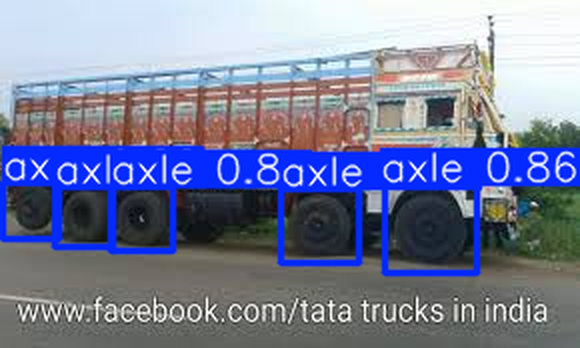

In [31]:
#img annotation styling
annotated_image_array = result.plot(
    line_width=2,
    font_size=5
)

#convert the BGR numpy array (from OpenCV) to an RGB PIL Image
annotated_image_pil = Image.fromarray(annotated_image_array[..., ::-1])

#get current size and upscale
original_width, original_height = annotated_image_pil.size

scaling_factor = 2

new_width = int(original_width * scaling_factor)
new_height = int(original_height * scaling_factor)

#resize image using high quality resampling 
upscaled_image_pil = annotated_image_pil.resize((new_width, new_height), Image.Resampling.LANCZOS)


#display upscaled image
print(f"Displaying annotated and upscaled image (Original: {original_width}x{original_height}, Upscaled: {new_width}x{new_height}):")
display(upscaled_image_pil)